Using TensorFlow backend.


(50000, 28, 28) (50000,)


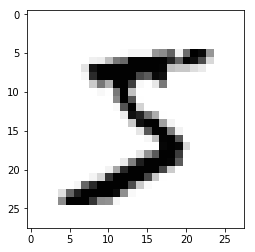

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import tensorflow as tf
from tensorflow import layers
import numpy as np

In [3]:
#reshape
X_train_, X_val_, X_test_ = np.reshape(X_train, [-1, 28*28]), np.reshape(X_val, [-1, 28*28]), np.reshape(X_test, [-1, 28 * 28])

In [4]:
# define placeholders
x_ = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.int64, [None])

In [12]:
# define model 2 h-l
h1 = layers.dense(x_, 50, tf.nn.relu)
h2 = layers.dense(h1, 50, tf.nn.relu)
out = layers.dense(h2, 10)

In [6]:
# parameters
batch_size = 64
iters = X_train.shape[0] // batch_size
epochs = 5

In [7]:
# define loss, optimization and prediction
predictions = tf.argmax(tf.nn.softmax(out), 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y_), tf.float32))
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf.squeeze(y_), logits=out))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [36]:
# for plotting
tr_losses, v_losses = [], []
iterations = []

In [37]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # track iterations
    cur_it = 0
    for e in range(epochs):
        # permute dataset every epoch
        perm = np.random.permutation(X_train.shape[0])
        X_train, y_train = X_train[perm], y_train[perm]
        for i in range(iters):
            batch_x = np.reshape(X_train[i*batch_size:batch_size*(i + 1)], [-1, 28*28])
            batch_y = y_train[i*batch_size:batch_size*(i + 1)]
            loss_, _, acc_ = sess.run([loss, optimizer, accuracy], {x_:batch_x, y_:batch_y})
            iterations.append(cur_it)
            tr_losses.append(loss_)
            if i % 500 == 0:
                val_loss, _, val_acc = sess.run([loss, optimizer, accuracy], {x_: X_val_, y_: y_val})
                print("Validation loss after {} iterations: {} accuracy {}".format(cur_it, val_loss, val_acc))
            cur_it+=1
        print("Train loss after {} epochs: {} accuracy: {}".format(e + 1, loss_, acc_))
    test_loss, _, test_acc = sess.run([loss, optimizer, accuracy], {x_: X_test_, y_: y_test})
    print("Final Test loss after {} epochs: {} accuracy {}".format(epochs, test_loss, test_acc))

Validation loss after 0 iterations: 2.2106733322143555 accuracy 0.20090000331401825
Validation loss after 500 iterations: 0.15878744423389435 accuracy 0.9531999826431274
Train loss after 1 epochs: 0.26576346158981323 accuracy: 0.890625
Validation loss after 781 iterations: 0.11731202155351639 accuracy 0.9635000228881836
Validation loss after 1281 iterations: 0.09561304748058319 accuracy 0.9695000052452087
Train loss after 2 epochs: 0.07085759937763214 accuracy: 0.96875
Validation loss after 1562 iterations: 0.08185403048992157 accuracy 0.9750000238418579
Validation loss after 2062 iterations: 0.0891430452466011 accuracy 0.9736999869346619
Train loss after 3 epochs: 0.06626150012016296 accuracy: 0.984375
Validation loss after 2343 iterations: 0.0908779576420784 accuracy 0.9740999937057495
Validation loss after 2843 iterations: 0.09555651992559433 accuracy 0.9732000231742859
Train loss after 4 epochs: 0.023075373843312263 accuracy: 1.0
Validation loss after 3124 iterations: 0.07887388020

In [38]:
% matplotlib inline
import matplotlib

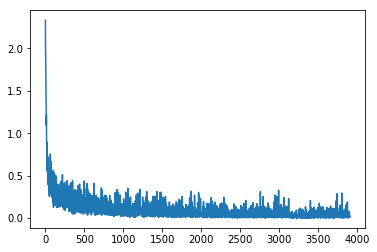

In [40]:
# plot training loss
plt.plot(iterations, tr_losses)
plt.show()